In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error , classification_report
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


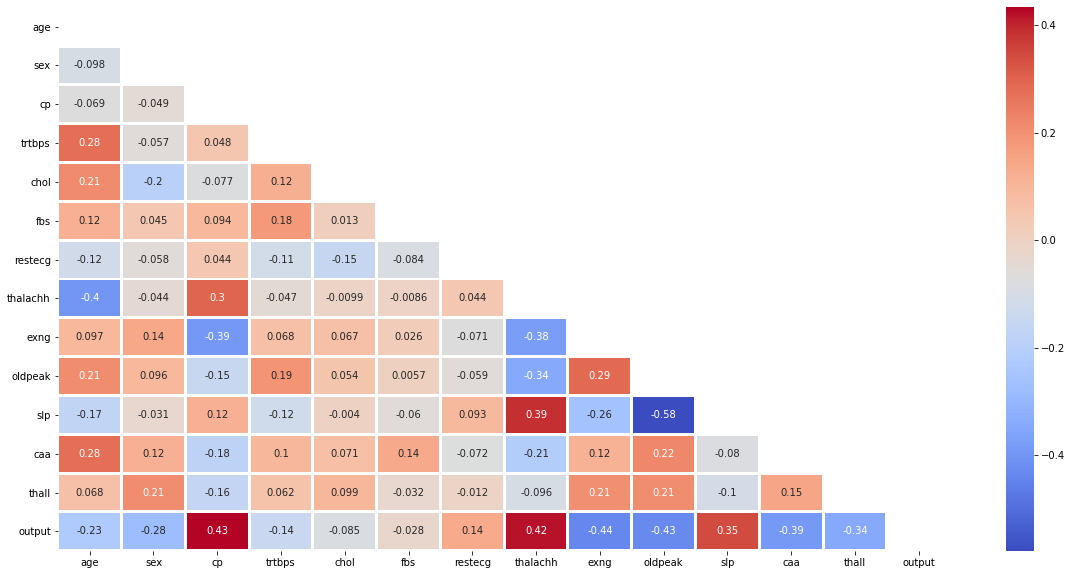

In [ ]:
r2Pearson = df.corr()

mask = np.triu(np.ones_like(r2Pearson , dtype = bool))

plt.figure(figsize = (20,10))
sns.heatmap(r2Pearson , annot = True , mask = mask , cmap= 'coolwarm' , linewidths= 2  )
# Pearson Correlation map

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['output'] = df.output.astype('str')
df['Heart Atack'] = df.output
#Chaning the Variables Name
df['Heart Atack'].replace({'0': 'Low Chance' , '1' : 'High Chance'} , inplace = True)
df['Heart Atack']  = df['Heart Atack'].astype(str)

#Choosing color Palette
k = ['#e07a5f' , '#81b29a']


fig = px.scatter(df,x= 'age' , y= 'thalachh' , color ='Heart Atack' , color_discrete_sequence = k ,
           template = 'none' , size = 'oldpeak', opacity = .8, title = 'Maximum Heart Rate per Age ',
           )

fig.update_layout (xaxis_title ='Age',
                     yaxis_title = 'Maximum Heart Rate')
fig.show()

In [ ]:
numvariables = df[['chol' , 'age' , 'thalachh' , 'trtbps','oldpeak' , ]]
#chol = cholesterol in mg/dl, thalachh = Maximum Heart Rate , trtbps = resting blood pressure, old peak = previsouly peak

catvariables = df[['sex' , 'cp' , 'fbs' , 'restecg' , 'exng' , 'caa']]
#cp = Chest Pain , fbs = fasting blood sugar , restecg = resting eletrocardiographic results, exng = exercised induced angina, 
#caa= number of major vessels

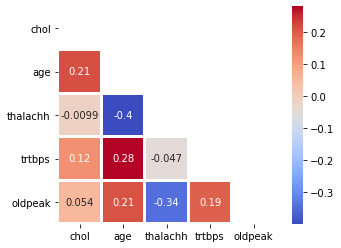

In [ ]:
corrv = numvariables.corr()
mask = np.triu(np.ones_like(corrv))
sns.heatmap(corrv , square = True , annot = True, cmap = 'coolwarm' , linewidths= 2 , mask = mask ,
             )

In [ ]:
fig = px.bar(df, x = df.age , y = df['trtbps'] , color ='Heart Atack', color_discrete_sequence= k , 
       template = 'none' , barmode = 'stack' , title = 'Resting Blood Pressure per Age' , )

fig.update_layout(xaxis_title = 'Age' ,
                  yaxis_title = 'Resting Blood Pressure (mmHg)')

In [ ]:
fig = px.histogram(df , x = df.chol , template = 'none' , color = 'Heart Atack' , color_discrete_sequence= k ,  barmode= 'stack' ,
       title = 'Cholesterol Distribution' , log_x = True   , marginal ='box' , nbins = 30  , opacity = .9 )


fig.update_layout(yaxis_title  = ' ' , 
                  xaxis_title = 'Cholesterol(log)')

In [ ]:
fig = px.histogram(df, x = df['thalachh'] , color = 'Heart Atack' , color_discrete_sequence= k, template = 'none' ,
                   marginal = 'box' , title = 'Maximum Heart Rate Distribution' , opacity = .9 )
fig.update_layout(yaxis_title = ' ' ,
                  xaxis_title = 'Maximum Heart Rate  (bpm)')
fig.show()

RandomForest Model

In [ ]:
#Label Encoding the Categorical Variables in our dataset
xcatvariables = pd.get_dummies(catvariables)
xcatvariables

,sex,cp,fbs,restecg,exng,caa
0,1,3,1,0,0,0
1,1,2,0,1,0,0
2,0,1,0,0,0,0
3,1,1,0,1,0,0
4,0,0,0,1,1,0
...,...,...,...,...,...,...
298,0,0,0,1,1,0
299,1,3,0,1,0,0
300,1,0,1,1,0,2
301,1,0,0,1,1,1


In [ ]:
#Normalizing our numerical categories
scaler = MinMaxScaler()
scaled = scaler.fit_transform(numvariables)
X = pd.DataFrame(scaled)
count = []
#creating a dataset with numerical features
for i in numvariables:
  X[i] = X[len(count)] 
  X.drop(len(count) , axis = 1 , inplace = True)
  count.append(1)


In [ ]:
#Bringing the categorical variables to our 'features' dataset
for i in catvariables:
  X[i] = xcatvariables[i]

X

,chol,age,thalachh,trtbps,oldpeak,sex,cp,fbs,restecg,exng,caa
0,0.244292,0.708333,0.603053,0.481132,0.370968,1,3,1,0,0,0
1,0.283105,0.166667,0.885496,0.339623,0.564516,1,2,0,1,0,0
2,0.178082,0.250000,0.770992,0.339623,0.225806,0,1,0,0,0,0
3,0.251142,0.562500,0.816794,0.245283,0.129032,1,1,0,1,0,0
4,0.520548,0.583333,0.702290,0.245283,0.096774,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
298,0.262557,0.583333,0.396947,0.433962,0.032258,0,0,0,1,1,0
299,0.315068,0.333333,0.465649,0.150943,0.193548,1,3,0,1,0,0
300,0.152968,0.812500,0.534351,0.471698,0.548387,1,0,1,1,0,2
301,0.011416,0.583333,0.335878,0.339623,0.193548,1,0,0,1,1,1


In [ ]:
y = df.output
#Isolating the target

In [ ]:
model = DecisionTreeClassifier() #baseline model
cross_val_score(model,X,y,scoring = 'accuracy', cv = 10) 
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

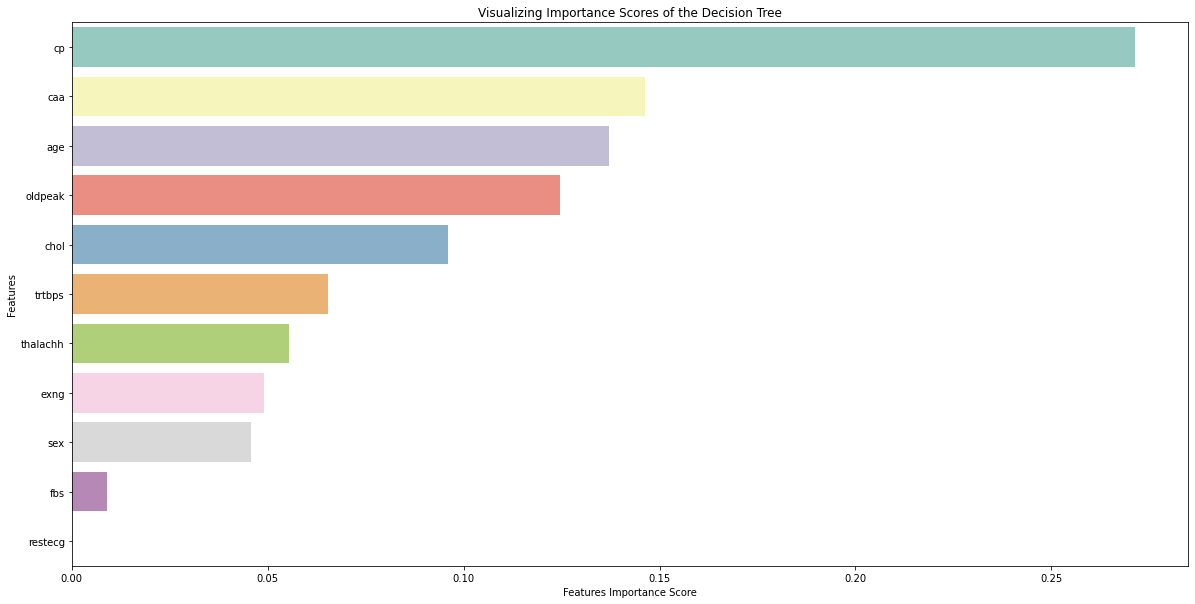

In [ ]:

#getting the best features of classifcation on our model (reducing the time of processing and enabling better tunning of important variables)
ifeatures = pd.Series(model.feature_importances_ , index = X.columns).sort_values(ascending = False)

def vizualizationOfImportantF(features):
  plt.figure(figsize = (20,10))
  sns.barplot(x = features , y = features.index , palette = 'Set3')

  plt.xlabel('Features Importance Score')
  plt.ylabel('Features')
  plt.title('Visualizing Importance Scores of the Decision Tree')
  plt.show()

vizualizationOfImportantF(ifeatures)


In [ ]:
X[ifeatures.index] 
#dropping the 2 last features in importance 
X.drop('restecg' ,axis = 1 , inplace = True)
X.drop('fbs' , axis = 1 , inplace = True)

In [ ]:
X

,chol,age,thalachh,trtbps,oldpeak,sex,cp,exng,caa
0,0.244292,0.708333,0.603053,0.481132,0.370968,1,3,0,0
1,0.283105,0.166667,0.885496,0.339623,0.564516,1,2,0,0
2,0.178082,0.250000,0.770992,0.339623,0.225806,0,1,0,0
3,0.251142,0.562500,0.816794,0.245283,0.129032,1,1,0,0
4,0.520548,0.583333,0.702290,0.245283,0.096774,0,0,1,0
...,...,...,...,...,...,...,...,...,...
298,0.262557,0.583333,0.396947,0.433962,0.032258,0,0,1,0
299,0.315068,0.333333,0.465649,0.150943,0.193548,1,3,0,0
300,0.152968,0.812500,0.534351,0.471698,0.548387,1,0,0,2
301,0.011416,0.583333,0.335878,0.339623,0.193548,1,0,1,1


Tunning our Model

In [ ]:
model = RandomForestClassifier(class_weight= 'balanced')
trees = [50,100,150,200,250]
crit = ['gini' , 'entropy']
maxd = [50,100,150,200,250]
min_sl = [1,2,3,7,10]


pgrid = dict(n_estimators = trees , criterion = crit , max_depth = maxd , 
             min_samples_split = min_sl , )


In [ ]:
grid = GridSearchCV(model, pgrid, scoring = 'accuracy' , cv = 10)

In [ ]:
grid.fit(X,y,)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                            

In [ ]:
grid.best_score_

0.8349462365591398

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 150,
 'min_samples_split': 3,
 'n_estimators': 150}

In [ ]:
RF = RandomForestClassifier(class_weight= 'balanced', criterion = 'gini' , max_depth= 250,
                       min_samples_split = 7 , n_estimators = 50)

RF.fit(X,y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=250, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

yp = RF.predict(X)
yhat = y
pd.crosstab(yhat , yp , rownames = ['real'] , colnames = 
            ['Predict'], margins = True)


Predict,0,1,All
real,,,
0,131,7,138
1,5,160,165
All,136,167,303


In [ ]:
print(classification_report(yhat , yp)) #note that, probably our model is overfitting, since the accuracy with crossvalidation is much lower (~-10%)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       138
           1       0.96      0.97      0.96       165

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



In [ ]:
RMSE = np.sqrt(mean_squared_error(yhat , yp))
RMSE

0.19900743804199783

In [ ]:
df.drop('Heart Atack', axis = 1, inplace = True)
Xi = df.drop('output' , axis = 1 , inplace = False)
Xi = pd.get_dummies(Xi)
Xi

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
pca = PCA() #Principal Component Analysis
logistic = LogisticRegression() 

pipe = Pipeline(steps = [('pca',pca) , ('logistic' , logistic)]) #pipeline with PCA and Logistic Regression model

#tunning parameters for PCA and Logistic Regression

lrparams = {'pca__n_components' : [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                'logistic__C' : [100,10,1,0.1,0.001],
                'logistic__solver' : ['newton-cg','lbfgs','liblinear',],
            'logistic__penalty': [None, 'l1','l2','elasticnet']}
                

grid = GridSearchCV(pipe,lrparams,scoring = 'accuracy', cv = 10)

In [ ]:
#normalizing data to feed into PCA

Xinumcat = [['trtbps' , 'chol' , 'thalachh','oldpeak' , 'age' , 'caa']] 
Normalizer = MinMaxScaler()
for i in Xinumcat:
  z = Normalizer.fit_transform(Xi[i])
  Xi.drop(i,axis = 1, inplace = True)
  Xi[i] = z 

Xi #data normalized


,sex,cp,fbs,restecg,exng,slp,thall,trtbps,chol,thalachh,oldpeak,age,caa
0,1,3,1,0,0,0,1,0.481132,0.244292,0.603053,0.370968,0.708333,0.00
1,1,2,0,1,0,0,2,0.339623,0.283105,0.885496,0.564516,0.166667,0.00
2,0,1,0,0,0,2,2,0.339623,0.178082,0.770992,0.225806,0.250000,0.00
3,1,1,0,1,0,2,2,0.245283,0.251142,0.816794,0.129032,0.562500,0.00
4,0,0,0,1,1,2,2,0.245283,0.520548,0.702290,0.096774,0.583333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,3,0.433962,0.262557,0.396947,0.032258,0.583333,0.00
299,1,3,0,1,0,1,3,0.150943,0.315068,0.465649,0.193548,0.333333,0.00
300,1,0,1,1,0,1,3,0.471698,0.152968,0.534351,0.548387,0.812500,0.50
301,1,0,0,1,1,1,3,0.339623,0.011416,0.335878,0.193548,0.583333,0.25


In [ ]:
grid.fit(Xi,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                   

In [ ]:
round(grid.best_score_,2)

0.84

In [ ]:
grid.best_params_

{'logistic__C': 1,
 'logistic__penalty': 'l2',
 'logistic__solver': 'newton-cg',
 'pca__n_components': 10}

In [ ]:
bLr = LogisticRegression(solver = 'newton-cg' ,)
bpca = PCA(n_components=10)
Xii = bpca.fit_transform(Xi)
bLr.fit(Xii,y)
yhat = y 
ypred = bLr.predict(Xii)

In [ ]:
pd.crosstab(yhat , ypred, margins = True)

col_0,0,1,All
output,,,
0,108,30,138
1,16,149,165
All,124,179,303


In [ ]:
rmse = np.sqrt(mean_squared_error(yhat , ypred))
rmse

0.3896346769964807

In [ ]:
print(classification_report(yhat,ypred)) #Note that the accuracy score it's equivalent from the cross_validation

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       138
           1       0.83      0.90      0.87       165

    accuracy                           0.85       303
   macro avg       0.85      0.84      0.85       303
weighted avg       0.85      0.85      0.85       303



In [ ]:
round(cross_val_score(bLr,Xii,y,cv = 50 ).mean(),2)

0.84

**Discussion:**:

Both models acquired the same mean accuracy when cross-validated with 50 folds, but in this case, Logistic Regression gets the best.
When looking at the results obtained by the RandomForest model, we see a great difference in accuracy when leading with the dataset without randomly sampling (95%)... This shows us that the model of RandomForest may be suffering from overfitting, that's a problem that Decision Trees face, we try to overcome with the model RandomForest which utilizes many trees, but seems that is not sufficient.

In another way, the Logistic Regression with PCA has established an 84% accuracy with precision.


In [ ]:
pickle.dump(bLr,open('LinearRegressionHeartDiseaseClassifier.sav', 'wb'))
pickle.load(open('LinearRegressionHeartDiseaseClassifier.sav','rb'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)